## Regimes

https://awealthofcommonsense.com/2021/01/its-time-to-prepare-for-markets-economy-to-get-weird/

The idea of this research is that things trend until there's reallocation of a portfolio. Then a new winner emerges. </p>
Cycles are marked by correlated movements and then a big drawdown.

In [1]:
from atom_wrapper import atomwrapper
import pandas as pd
import pandas as pd
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [18, 5]
plt.rcParams['axes.grid'] = True
import matplotlib
font = {'size'   : 12}
matplotlib.rc('font', **font)
pd.set_option('display.max_rows', 200)
ar = atomwrapper.AtomWrapper()

In [2]:
etfs = [
    'QQQ US Equity', #'Invesco QQQ Trust Series 1 (U.S.)'
    'SPY US Equity', # 'SPDR'
    'IEMG US Equity', # 'Core MSCI Emerging Markets ETF'
    'EFA US Equity', # 'MSCI EAFE ETF'
    'IWN US Equity', # 'Russell 2000 Value ETF'
    'IWM US Equity', #  'Russell 2000 ETF'
]

fxs = [
    'USD Crncy',
    'USDJPY Crncy',
    'USDCNH Crncy',
    'USDCAD Crncy',
    'USDMXN Crncy',
    'USDBRL Crncy'
]

In [3]:
df = ar.get_history(securities=etfs, start=pd.to_datetime('2015-01-01'), 
                   end=pd.to_datetime('2022-01-01'), fields=['PX_LAST'])
df.columns = df.columns.get_level_values(0)

error message comes from bpipe securityError = {
    source = "3186::bbdbh14"
    code = -1
    category = "NOT_ENTITLED"
    message = "Security Entitlement Check Failed [nid:3186] "
}



In [4]:
corrs = df.pct_change().rolling(5).corr().dropna().reset_index().set_index("datetime")
corrs = corrs.drop('level_1', axis=1)
corrs = corrs.applymap(lambda x: round(x, 5))
corrs =corrs.replace(1, np.nan).mean(axis=1)
corrs = corrs.groupby(corrs.index).mean()

In [5]:
corrs[corrs > 0.98]

datetime
2015-10-02    0.992534
2016-06-24    0.984927
2018-03-27    0.981308
2020-03-10    0.980965
2020-03-11    0.987898
2020-03-12    0.990323
2020-03-13    0.994072
2020-03-16    0.994326
2020-03-17    0.994732
2020-03-18    0.989145
dtype: float64

/home/ssl/pipshellstreet/swaps/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  """Entry point for launching an IPython kernel.


<AxesSubplot:label='15a8ea16-40ff-48dd-8424-a74fc04dfa8f'>

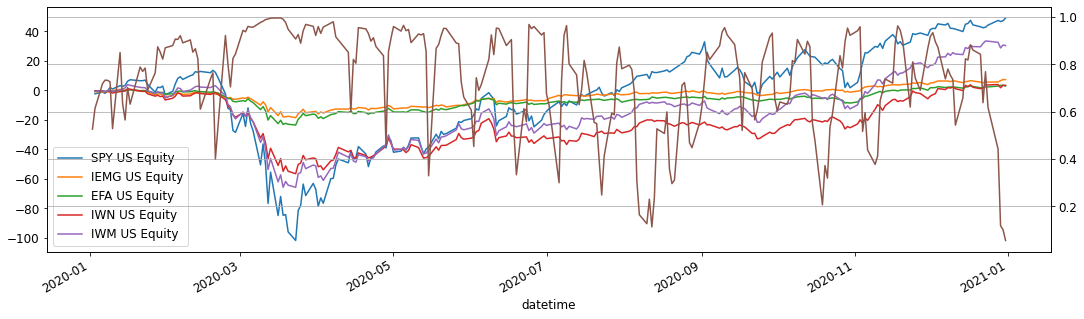

In [6]:
df['2020'].diff().cumsum().plot()
corrs['2020'].plot(secondary_y=True)

<AxesSubplot:label='fe8f316f-725e-4c3b-8907-716cda07c661'>

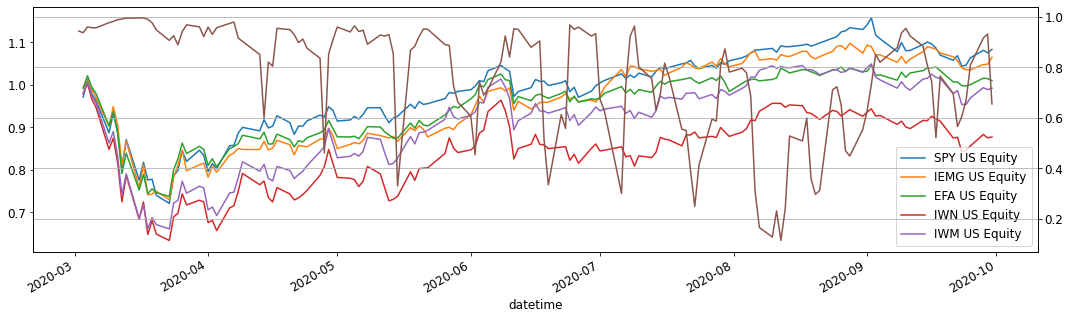

In [7]:
(1+df['2020-03':'2020-09'].pct_change()).cumprod().plot()
corrs['2020-03':'2020-09'].plot(secondary_y=True)

<AxesSubplot:label='0871ed96-7587-4fff-86f1-1149819c971d'>

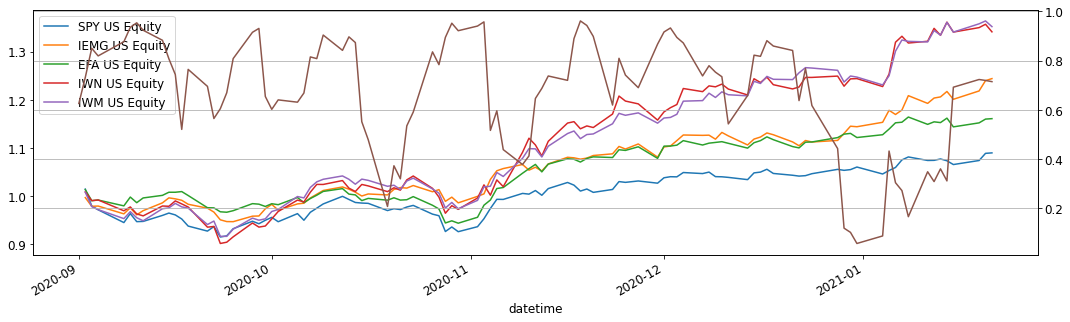

In [8]:
(1+df['2020-09':].pct_change()).cumprod().plot()
corrs['2020-09':].plot(secondary_y=True)

<AxesSubplot:label='ed927836-5f07-467e-b303-824bb5afff1c'>

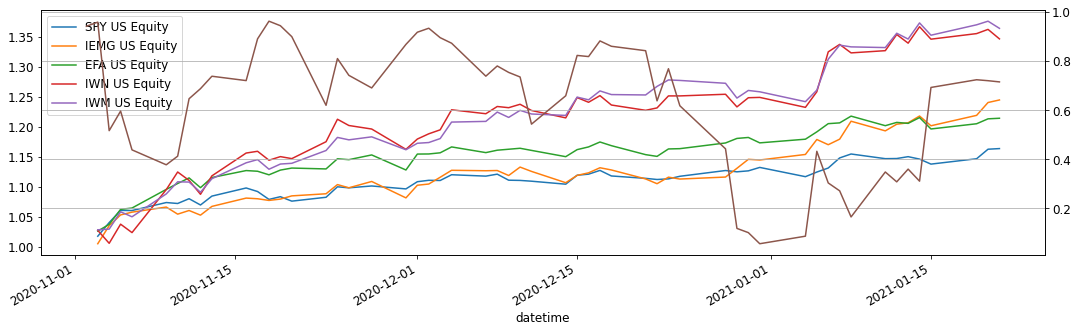

In [9]:
(1+df['2020-11-01':].pct_change()).cumprod().plot()
corrs['2020-11-01':].plot(secondary_y=True)

<AxesSubplot:xlabel='datetime'>

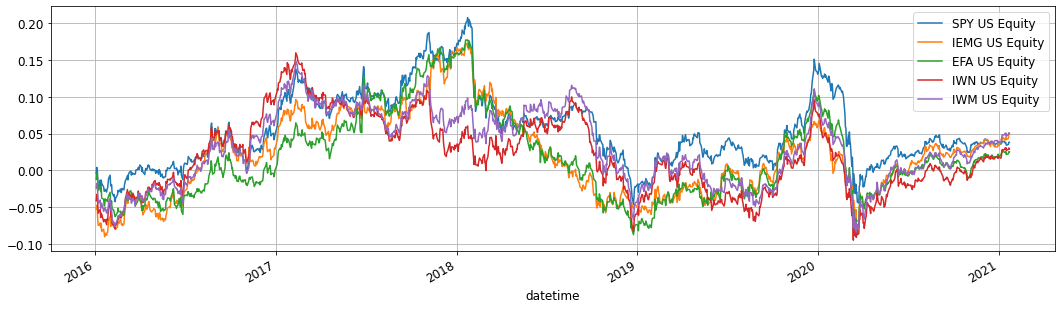

In [10]:
window = 252
rolling_sharpes = (df.pct_change().rolling(window).mean() / df.pct_change().rolling(window).std())
rolling_sharpes.plot()

In [11]:
rolling_sharpes.idxmax(axis=1).value_counts()

SPY US Equity     891
IWN US Equity     154
IWM US Equity     128
IEMG US Equity     79
EFA US Equity      20
dtype: int64

<AxesSubplot:xlabel='datetime'>

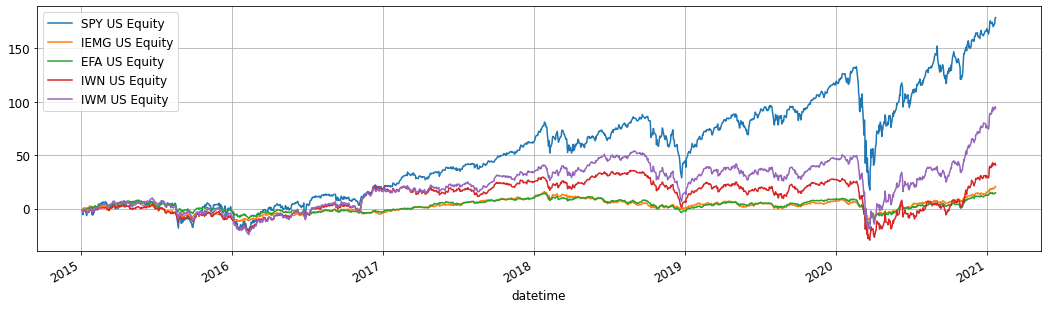

In [12]:
df.diff().cumsum().plot()

In [14]:
import atom_wrapper.atomwrapper as atomwrapper
ar = atomwrapper.AtomWrapper()

In [72]:
tickers = ['KINGFA', 'JSHL', 'CVTE', 'BRGF', 'CBC', 'ZHEJIANG MEIDA', 'TBGF', 'XBGF', 'DAJY']
len(tickers)

9

In [73]:
cntickers = ['600143 CH Equity', '601100 CH Equity', '002841 CH Equity', '002568 CH Equity', 
           '600132 CH Equity', '002677 CH Equity', '002124 CH Equity', '002705 CH Equity', 
           '002030 CH Equity']
len(cntickers)

9

In [41]:
vol = ar.get_history(cntickers, start=pd.to_datetime('2015-01-01'), end=pd.to_datetime('2022-01-01'), fields=['VOLUME'])
vol.columns = vol.columns.get_level_values(0)

In [74]:
cn = ar.get_history(cntickers, start=pd.to_datetime('2015-01-01'), end=pd.to_datetime('2022-01-01'), fields=['PX_LAST'])
cn.columns = tickers

In [75]:
cnys = [('2021-02-11', '2021-02-17'),
       ('2020-01-24', '2020-02-02'),
       ('2019-02-04', '2019-02-10'),
       ('2018-02-15', '2018-02-21'),
       ('2017-01-27', '2017-02-04'),
       ('2016-02-07', '2016-02-13'),
       ('2015-02-18', '2015-02-24'),
      ]

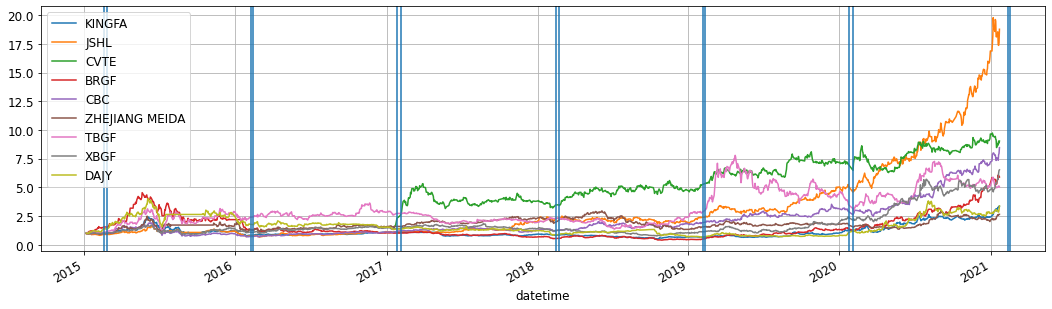

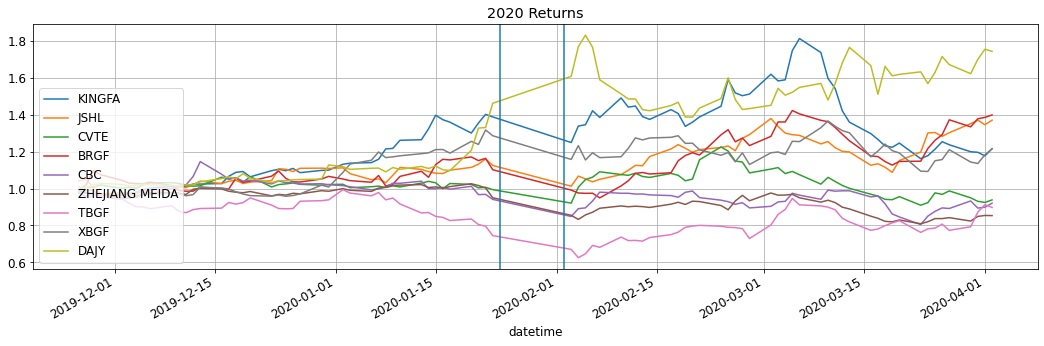

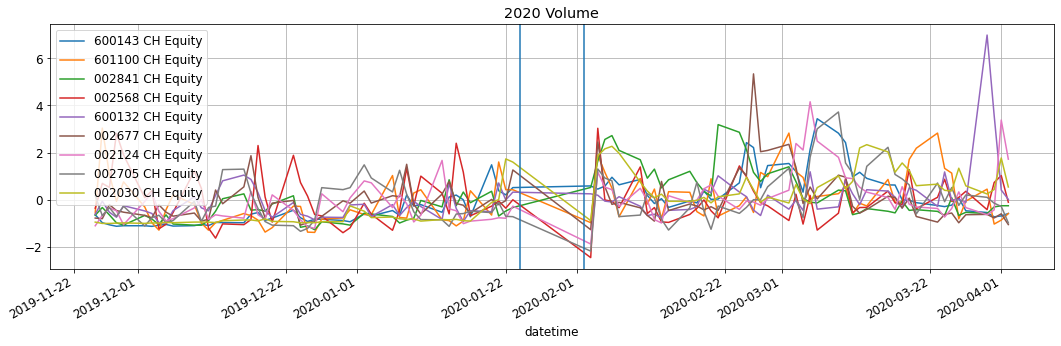

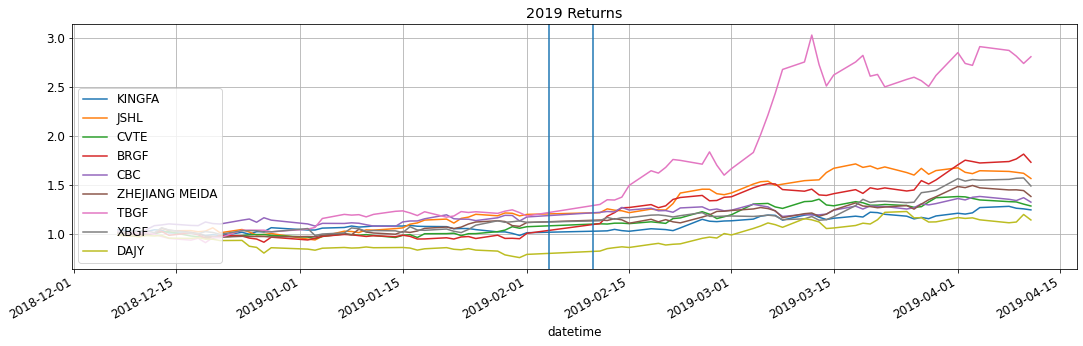

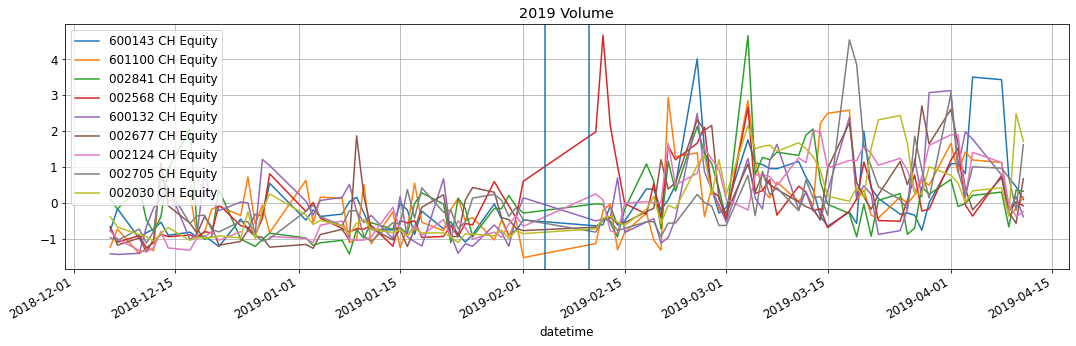

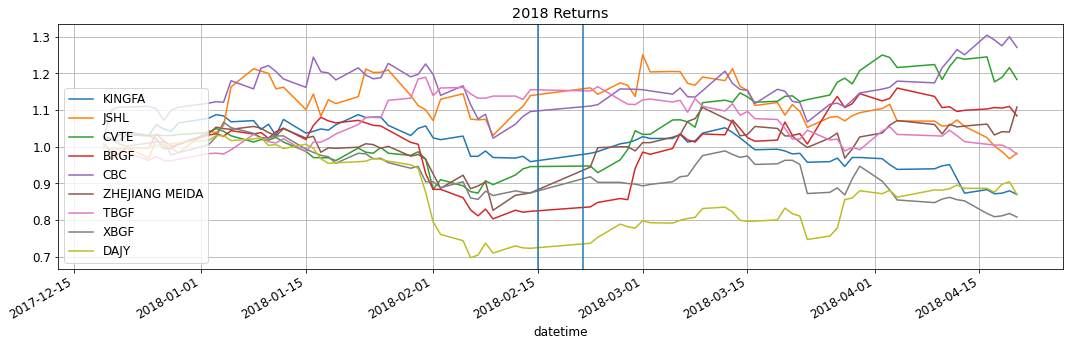

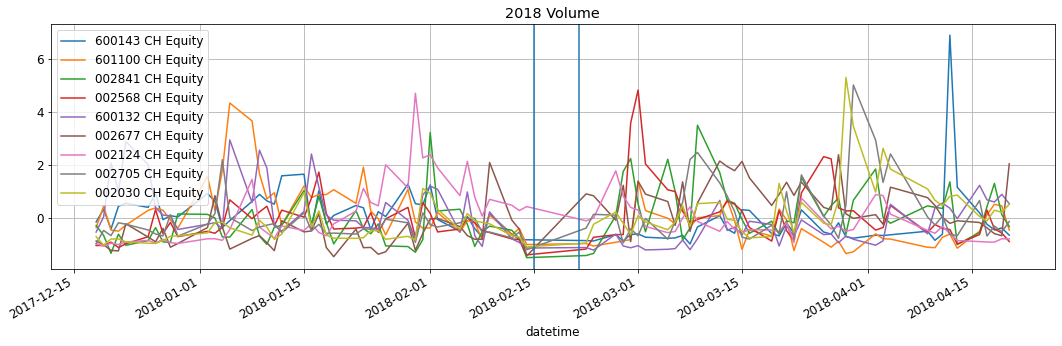

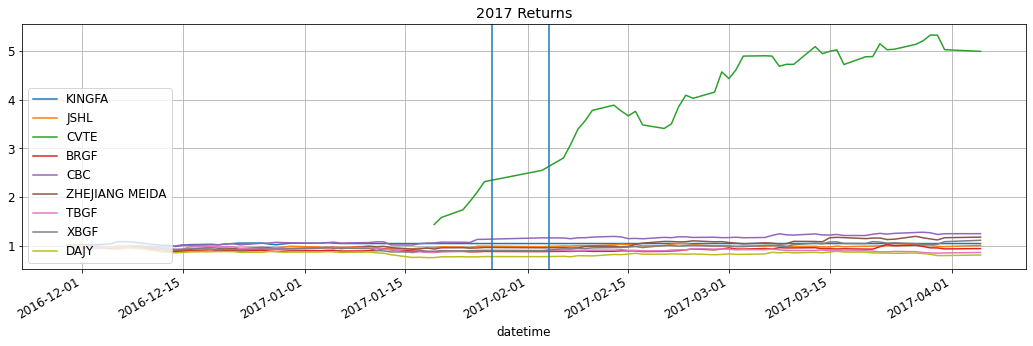

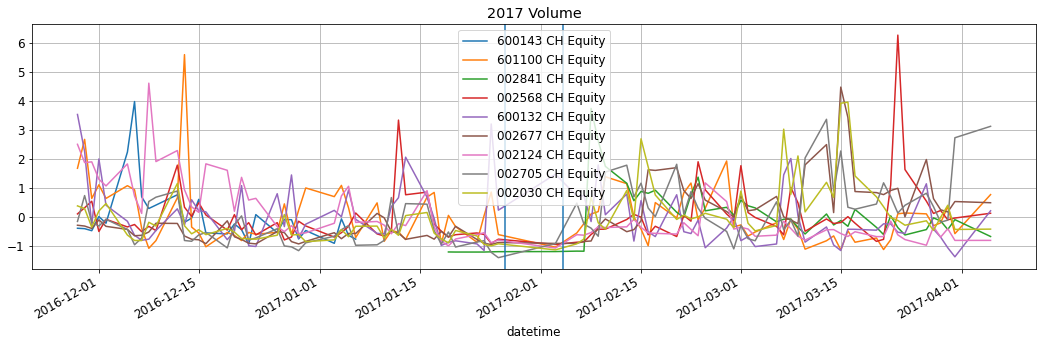

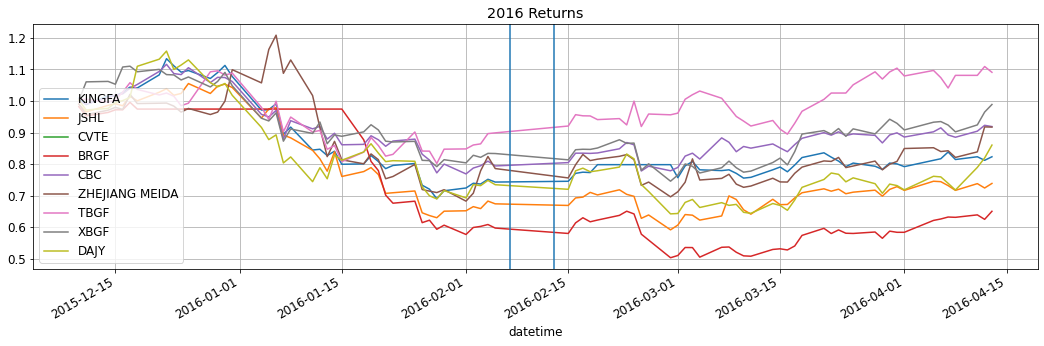

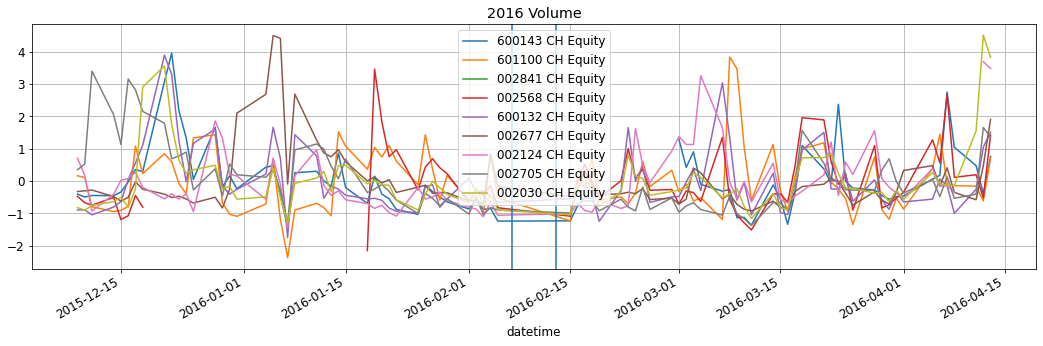

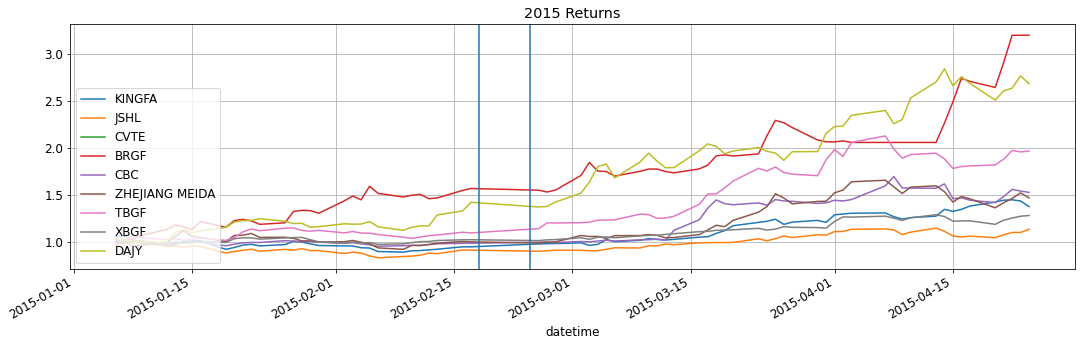

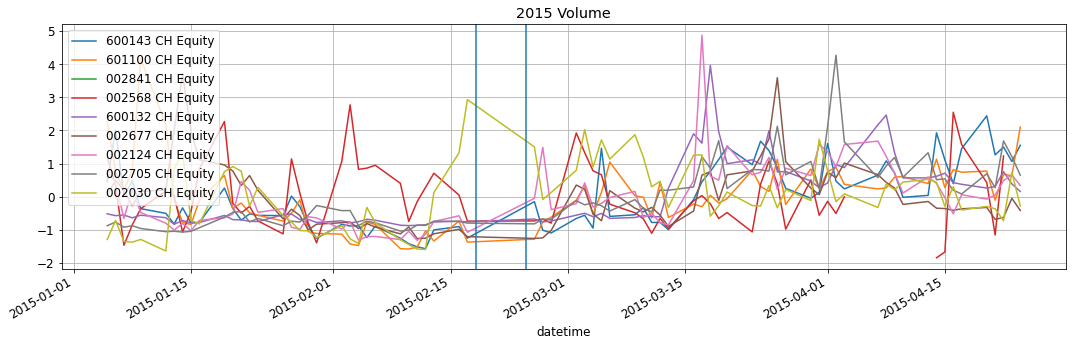

In [154]:
(1+cn.pct_change()).cumprod().plot()
for cny in cnys:
    plt.axvline(cny[0])
    plt.axvline(cny[1])
    
for cny in cnys[1:]:
    start = pd.to_datetime(cny[0])-pd.Timedelta(days=60)
    end = pd.to_datetime(cny[1])+pd.Timedelta(days=60)
    (1+cn[start:end].pct_change()).cumprod().plot()
    plt.axvline(cny[0])
    plt.axvline(cny[1])
    plt.title(cny[0].split('-')[0]+ ' Returns')
    plt.legend(loc=3)
    ((vol[start:end] - vol[start:end].mean())/vol[start:end].std()).plot()
    plt.axvline(cny[0])
    plt.axvline(cny[1])
    plt.title(cny[0].split('-')[0]+ " Volume")
    plt.show()
    

In [79]:
import ultron
import yfinance as yf

In [80]:
ticker = 'PLTK'

In [81]:
stories =ultron.edf_get_analytics_story(start_date='2020-09-01', end_date='2022-01-01', tickers=[ticker])

Found 162 article(s)
{'query': {'bool': {'filter': [{'range': {'ts_update': {'gte': datetime.datetime(2020, 9, 1, 0, 0),
                                                        'lt': datetime.datetime(2022, 1, 1, 0, 0)}}}],
                    'must': [{'match': {'event_type': 'analytic'}},
                             {'match_phrase': {'parsed_StructuredScoreList.EntityId': 'PLTK'}}]}}}


In [82]:
ur = ultron.edf_analytics_story_get_ticker_sentiment(stories)
ur = ur[ur.ticker==ticker]
ur.set_index('utc_time', inplace=True)
ur = ur.drop_duplicates(subset='suid')

In [83]:
tr = yf.ticker.Ticker(ticker)
px = tr.history(period='12mo')

<AxesSubplot:xlabel='Date'>

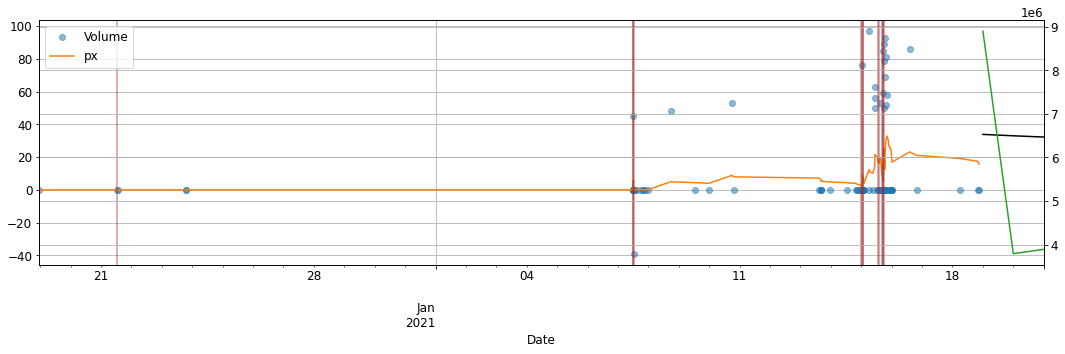

In [84]:
ur.sentiment.plot(alpha=0.5, linestyle='', marker='o')
ur.sentiment.ewm(10).mean().plot()
[plt.axvline(x, color='brown', alpha=0.5) for x in ur[ur.analytics_type=='MMN'].index]
px['Volume'].plot(secondary_y=True)
plt.legend()
px['Open'].plot(color='black', label='px', legend=True)

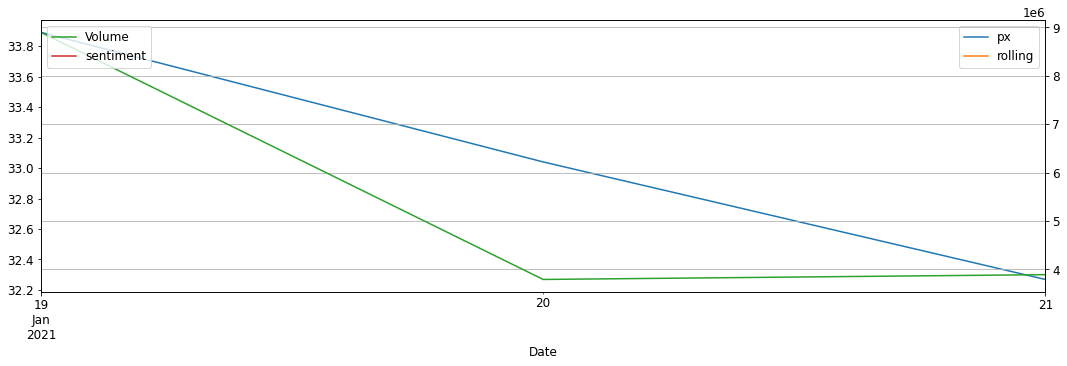

In [85]:
px['Open'].plot(label='px');
px['Open'].rolling(30).mean().plot(label='rolling');
plt.legend(loc=0)
px['Volume'].plot(secondary_y=True)
ur.sentiment.resample('1D').sum().reindex(px.index).ewm(30).mean().plot(secondary_y=True)
plt.legend(loc=2);

In [86]:
for i in ur[ur['sentiment']<0].iterrows():
    if i[1]['headline']:
        print(i[0], i[1]['sentiment'], ':', i[1]['headline'])

2021-01-07 12:20:28.601000+00:00 -39.0 : Zawya: Playtika aims at near $10bln valuation in U.S. listing


### Pairs Trading

In [169]:
s = ar.search('First Trust').security

In [170]:
s = s.str.split(" ", expand=True)[0].values

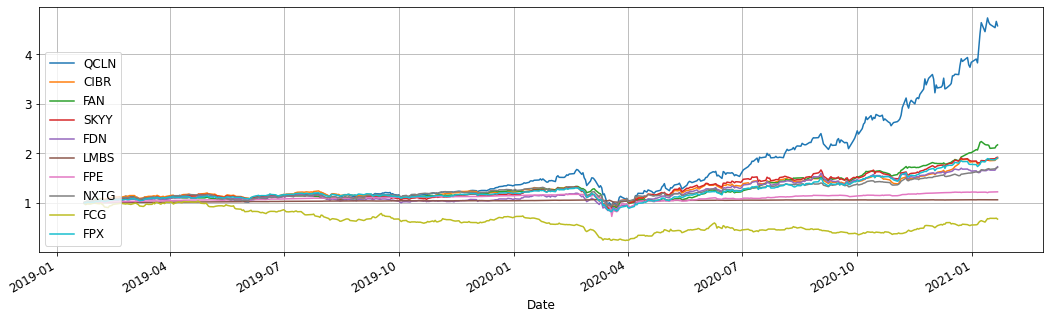

In [176]:
for i in s:
    tr = yf.ticker.Ticker(i)
    stock = tr.history(period=time)
    (1+stock['Open'].pct_change()).cumprod().plot(label=i)
    plt.legend(loc=3)

In [143]:
time = '24mo'

tr = yf.ticker.Ticker('ARKK') # Innovation
arkk = tr.history(period=time)
arkk_pct = -1+(1+arkk['Open'].pct_change()).cumprod()
arkk_raw = (arkk['Open']-arkk['Open'].iloc[0])

tr = yf.ticker.Ticker('ARKW') # Next Gen Internet
arkw = tr.history(period=time)
arkw_pct = -1+(1+arkw['Open'].pct_change()).cumprod()
arkw_raw = (arkw['Open']-arkw['Open'].iloc[0])

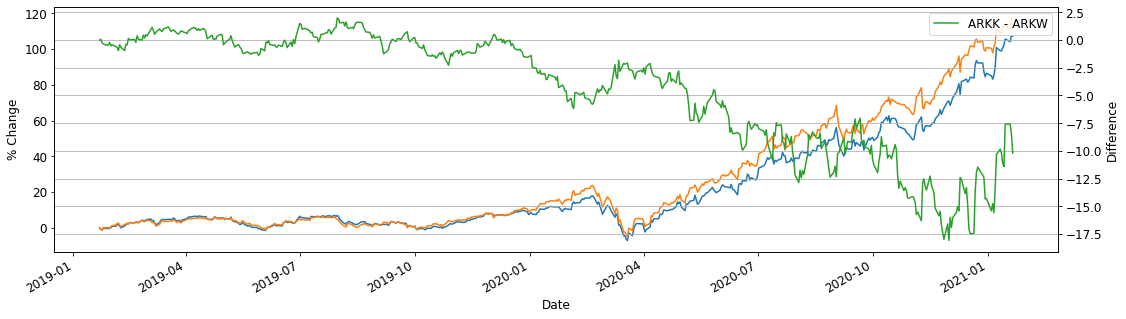

In [145]:
arkk_raw.plot(label='Innovation (ARKK)')
arkw_raw.plot(label='Next Gen Internet (ARKW)')
plt.ylabel("% Change")
(arkk_raw - arkw_raw).plot(label='ARKK - ARKW', secondary_y=True);
plt.ylabel("Difference")
plt.legend();

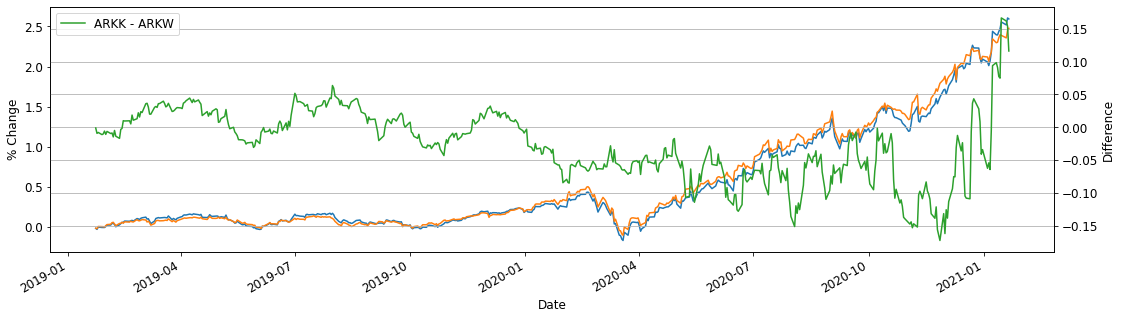

In [146]:
arkk_pct.plot(label='Innovation (ARKK)')
arkw_pct.plot(label='Next Gen Internet (ARKW)')
plt.ylabel("% Change")
(arkk_pct - arkw_pct).plot(label='ARKK - ARKW', secondary_y=True);
plt.ylabel("Difference")
plt.legend();

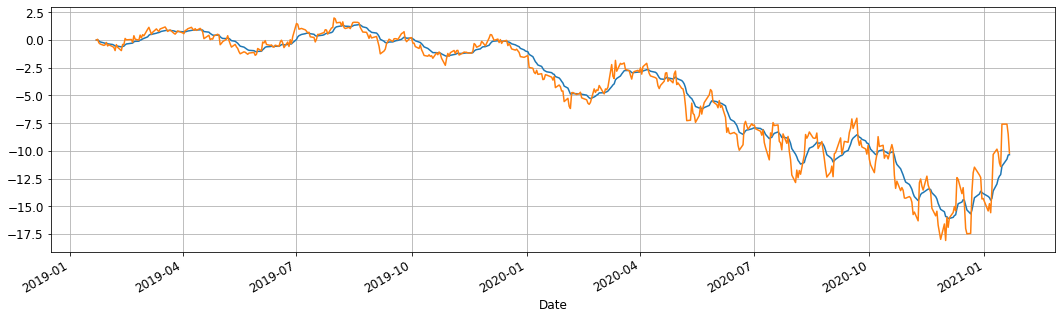

In [153]:
(arkk_raw - arkw_raw).ewm(5).mean().plot(label='ARKK - ARKW');
(arkk_raw - arkw_raw).plot(label='ARKK - ARKW');